## Case Study: Pulsar star prediction using support vector machines

Post-EDA modelling and prediction is performed on the dataset using support vector machines and the results are analysed.

Importing required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Defining a color palette for binary hued plots:

In [2]:
biCol = ['maroon', 'thistle']

Reading the data from the .csv file into a pandas dataframe:

In [3]:
df = pd.read_csv('pulsar_data_train.csv')

Displaying the first and last five rows of the dataframe:

In [4]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


Displaying the general information of the dataframe:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Displaying the basic descriptive statistics of the dataframe:

In [6]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [7]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [8]:
df[' Excess kurtosis of the integrated profile'].fillna(df[' Excess kurtosis of the integrated profile'].median(), inplace = True)

In [9]:
df[' Standard deviation of the DM-SNR curve'].fillna(df[' Standard deviation of the DM-SNR curve'].median(), inplace = True)

In [10]:
df[' Skewness of the DM-SNR curve'].fillna(df[' Skewness of the DM-SNR curve'].median(), inplace = True)

In [11]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

The count of data points for each outcome is checked to understand if the dataset is balanced or not.

In [12]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [13]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

<AxesSubplot:xlabel='target_class', ylabel='count'>

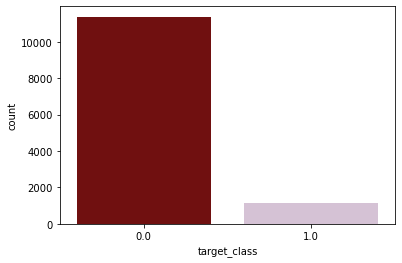

In [14]:
sns.countplot(x = 'target_class', data = df, palette = biCol)

The pairplot is displayed to check for visual cues of correlated variables/features.

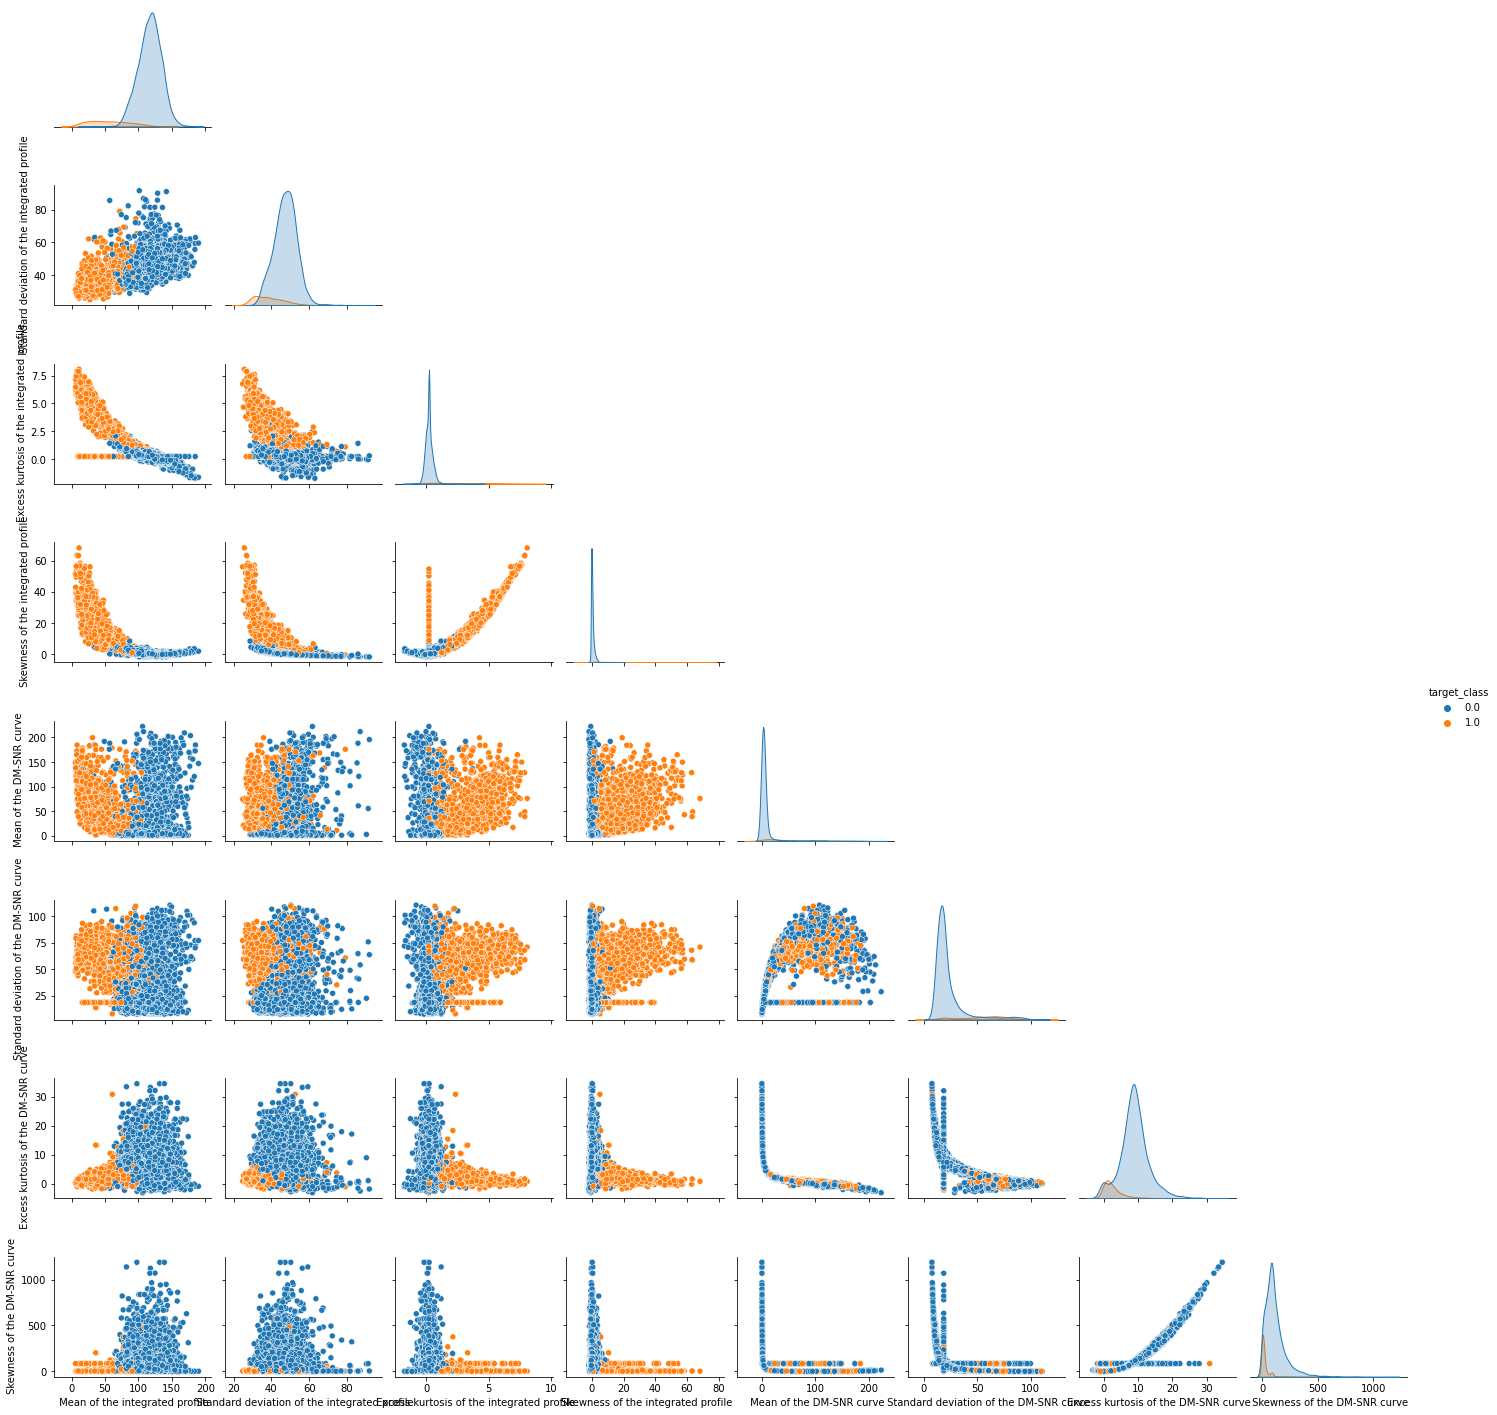

In [15]:
sns.pairplot(data = df, hue = 'target_class', corner = True)

The correlation heatmap is displayed to get a quantified sense of the same.

<AxesSubplot:>

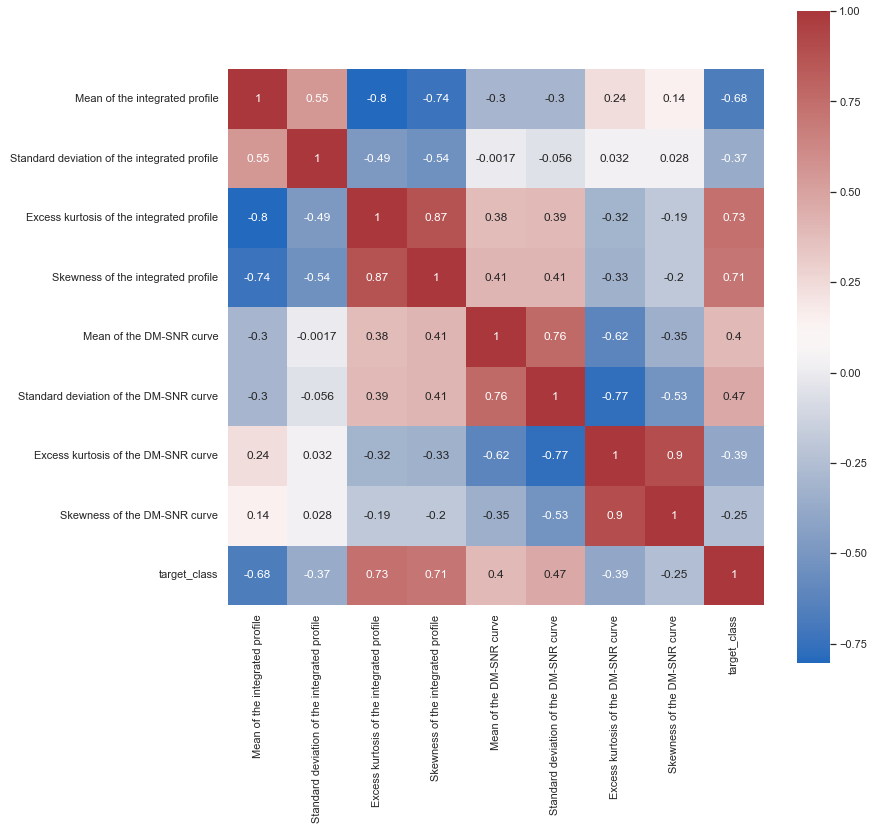

In [16]:
sns.set(rc = {'figure.figsize': (12, 12)})

corr = df.corr()
sns.heatmap(data = corr, square = True, annot = True, cbar = True, cmap = 'vlag')

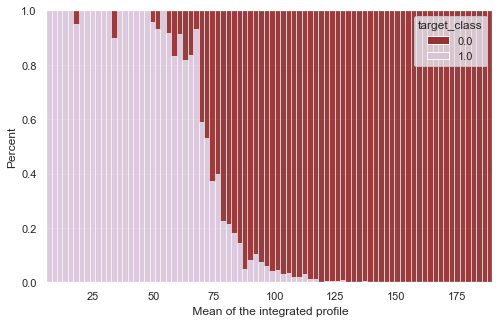

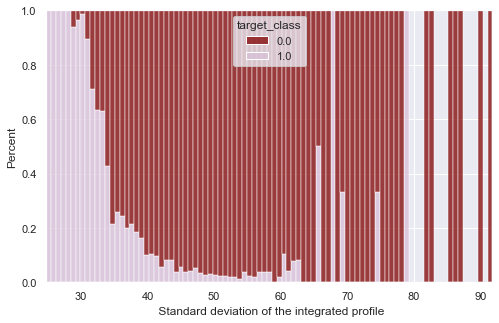

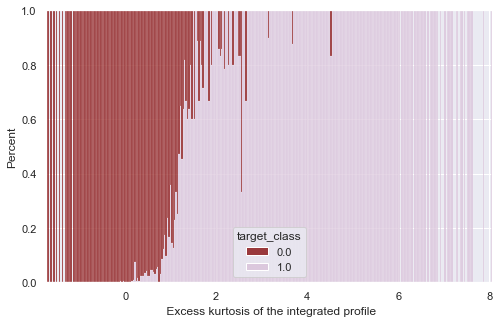

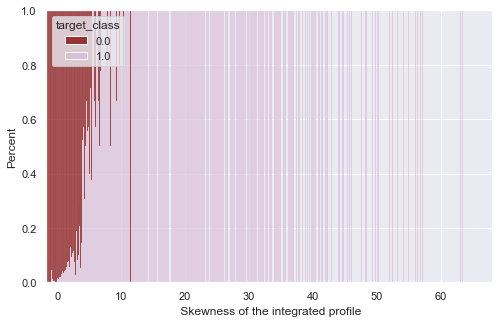

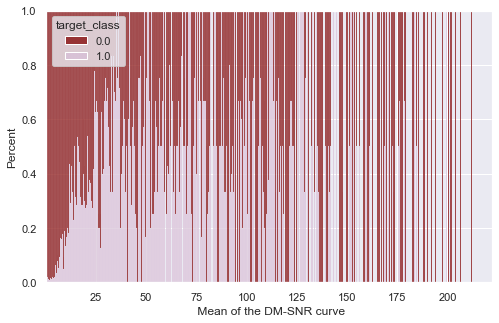

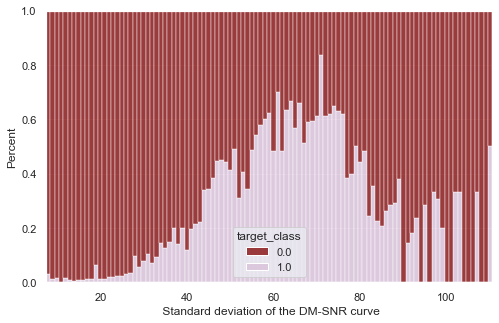

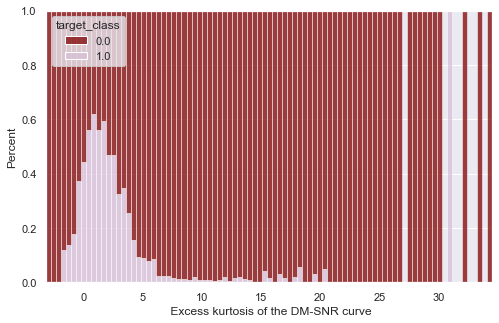

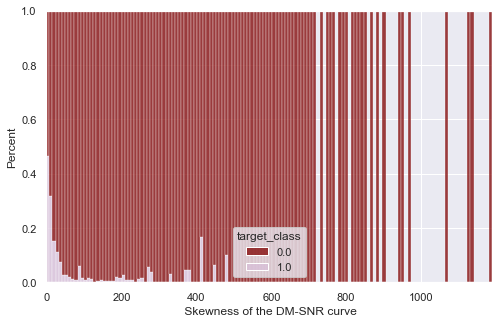

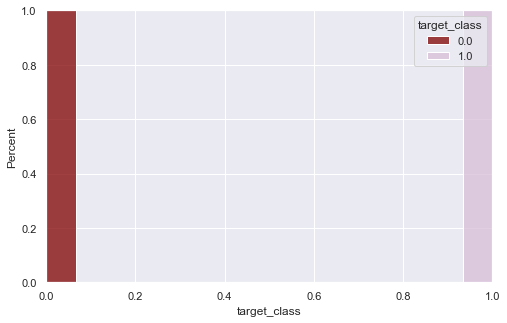

In [17]:
for column in df.columns:
    sns.set(rc = {'figure.figsize': (8, 5)})
    sns.histplot(df, x = column, hue = 'target_class', multiple = 'fill', stat = 'percent', palette = biCol)
    plt.show()

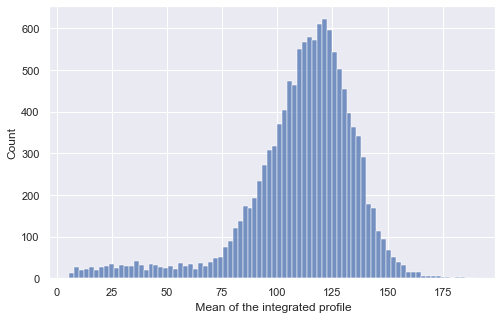

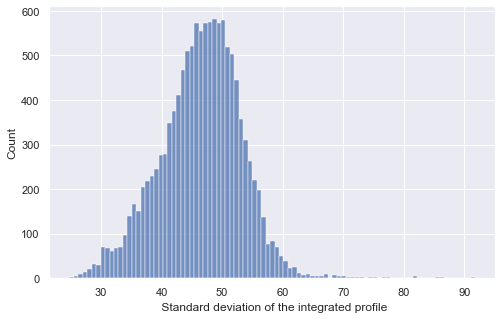

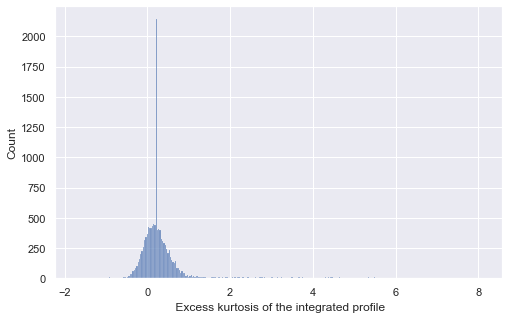

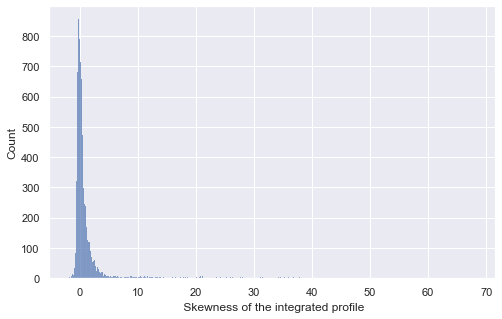

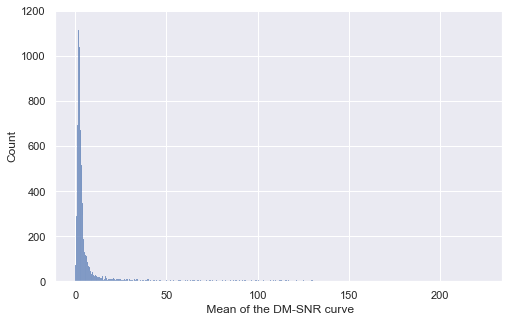

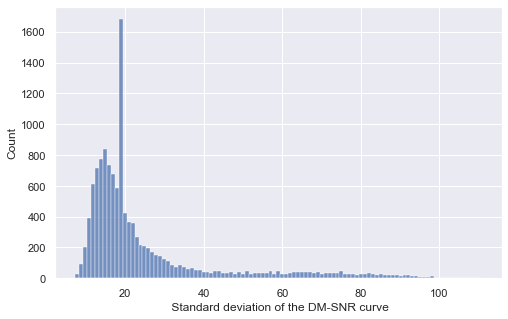

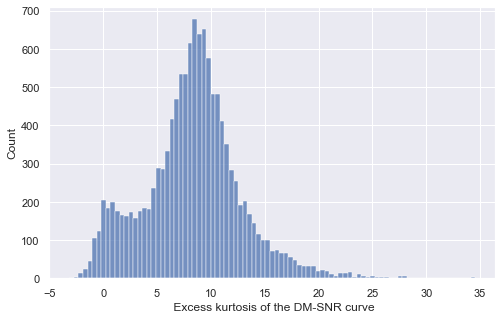

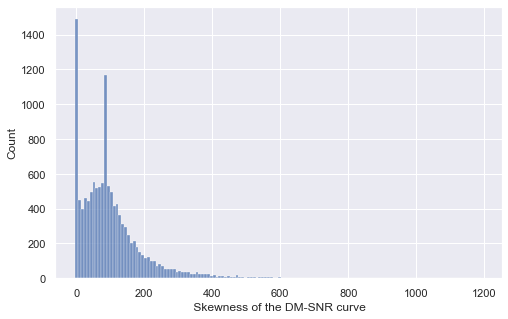

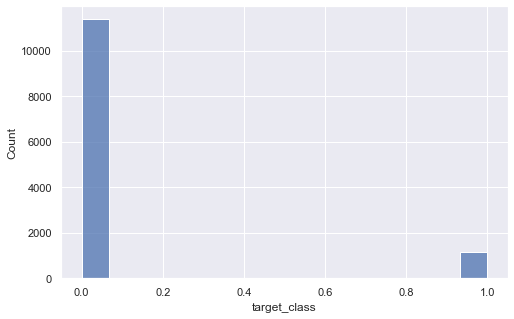

In [18]:
for column in df.columns:
    sns.set(rc = {'figure.figsize': (8, 5)})
    sns.histplot(df, x = column)
    plt.show()

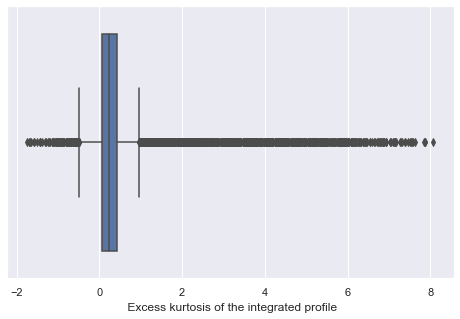

In [19]:
# for column in df.columns:
sns.set(rc = {'figure.figsize': (8, 5)})
sns.boxplot(x = df[' Excess kurtosis of the integrated profile'])
plt.show()

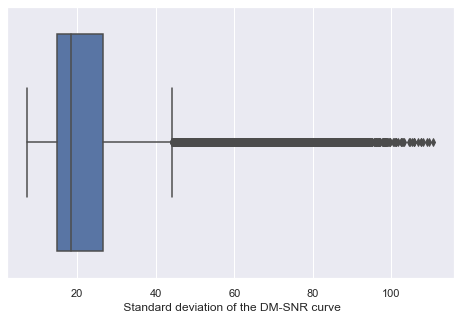

In [20]:
sns.set(rc = {'figure.figsize': (8, 5)})
sns.boxplot(x = df[' Standard deviation of the DM-SNR curve'])
plt.show()

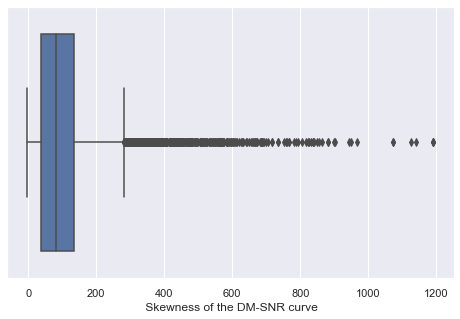

In [21]:
sns.set(rc = {'figure.figsize': (8, 5)})
sns.boxplot(x = df[' Skewness of the DM-SNR curve'])
plt.show()

In [22]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [23]:
for column in df.columns:
    df = df.rename(columns = {column: column.strip()})

In [24]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [25]:
X = df.drop(['target_class'], axis = 1)
y = df['target_class']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train.shape, X_test.shape

((10022, 8), (2506, 8))

In [28]:
cols = X_train.columns

In [29]:
X_train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
2390,139.695312,42.056428,-0.213162,0.251980,5.748328,24.290006,5.097661,29.108023
6313,89.507812,38.967935,0.445968,1.559898,0.756689,10.146016,18.139356,385.359516
1163,98.867188,48.171466,0.415157,0.411022,1.485786,18.152383,12.202016,147.752281
1269,131.648438,50.254911,0.009662,0.085277,0.213211,7.370432,34.539844,1191.000837
3964,100.429688,46.212600,0.568687,0.504532,3.021739,18.735249,8.098372,77.709686
...,...,...,...,...,...,...,...,...
4859,129.539062,49.298660,0.045527,-0.306169,2.370401,20.103431,9.292540,90.724946
3264,102.007812,46.045408,0.472770,0.441978,1.841137,14.450579,10.900557,140.195886
9845,78.421875,33.081719,2.056812,9.630448,2.002508,19.735267,10.654755,116.145304
10799,126.406250,49.263551,-0.053177,-0.071847,3.906355,23.608844,6.973065,52.172082


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [32]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [33]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-2.459299e-16,-7.557537e-16,1.047855e-16,-3.175468e-17,-3.442722e-17,-3.279323e-17,-1.339313e-16,1.089951e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.059253e+00,-3.121855e+00,-2.176364e+00,-5.703669e-01,-4.225211e-01,-9.679603e-01,-2.526379e+00,-1.014557e+00
25%,-3.943394e-01,-6.101706e-01,-3.888046e-01,-3.175801e-01,-3.653436e-01,-5.767818e-01,-5.589324e-01,-6.338157e-01
50%,1.619199e-01,5.986146e-02,-2.242758e-01,-2.549120e-01,-3.355278e-01,-3.831715e-01,2.442155e-02,-2.028493e-01
75%,6.265131e-01,6.579129e-01,-2.732538e-02,-1.397269e-01,-2.459675e-01,5.550782e-02,5.276848e-01,2.991024e-01
max,3.045294e+00,6.647182e+00,7.583132e+00,1.045442e+01,7.074053e+00,4.501370e+00,5.769814e+00,1.036396e+01


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC() 

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9792


In [35]:
svc = SVC(C = 100.0) 

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with rbf kernel and C = 100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C = 100.0 : 0.9796


In [36]:
svc = SVC(C = 1000.0) 

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Model accuracy score with rbf kernel and C = 1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C = 1000.0 : 0.9804


In [37]:
linear_svc = SVC(kernel = 'linear', C = 1.0) 

linear_svc.fit(X_train, y_train)

y_pred_test = linear_svc.predict(X_test)

print('Model accuracy score with linear kernel and C = 1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C = 1.0 : 0.9773


In [38]:
linear_svc = SVC(kernel = 'linear', C = 100.0) 

linear_svc.fit(X_train, y_train)

y_pred_test = linear_svc.predict(X_test)

print('Model accuracy score with linear kernel and C = 100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C = 100.0 : 0.9777


In [39]:
linear_svc = SVC(kernel = 'linear', C = 1000.0) 

linear_svc.fit(X_train, y_train)

y_pred_test = linear_svc.predict(X_test)

print('Model accuracy score with linear kernel and C = 1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C = 1000.0 : 0.9777


In [40]:
y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9756


In [41]:
null_accuracy = y_test.value_counts()[0]/(y_test.value_counts()[0] + y_test.value_counts()[1])
print(null_accuracy)

0.9118116520351157


In [42]:
for c in [1, 100.0, 1000.0]:

    poly_svc = SVC(kernel = 'poly', C = c) 

    poly_svc.fit(X_train, y_train)

    y_pred = poly_svc.predict(X_test)

    print('Model accuracy score with polynomial kernel and C = {a:.1f} : {b:0.4f}'. format(a = c, b = accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C = 1.0 : 0.9749
Model accuracy score with polynomial kernel and C = 100.0 : 0.9792
Model accuracy score with polynomial kernel and C = 1000.0 : 0.9796


In [43]:
for c in [1, 10.0, 100.0]:

    poly_svc = SVC(kernel = 'sigmoid', C = c) 

    poly_svc.fit(X_train, y_train)

    y_pred = poly_svc.predict(X_test)

    print('Model accuracy score with sigmoid kernel and C = {a:.1f} : {b:0.4f}'. format(a = c, b = accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C = 1.0 : 0.8775
Model accuracy score with sigmoid kernel and C = 10.0 : 0.8775
Model accuracy score with sigmoid kernel and C = 100.0 : 0.8775


In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[2277    8]
 [  48  173]]

True Positives(TP) =  2277

True Negatives(TN) =  173

False Positives(FP) =  8

False Negatives(FN) =  48


<AxesSubplot:>

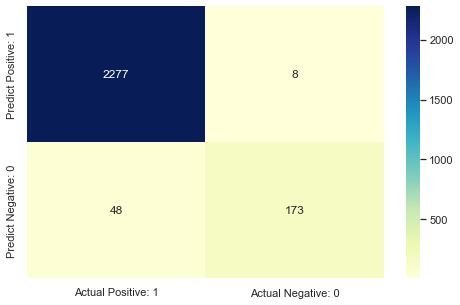

In [45]:
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive: 1', 'Actual Negative: 0'],
                         index = ['Predict Positive: 1', 'Predict Negative: 0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.96      0.78      0.86       221

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



In [47]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [48]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.9777


In [49]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error: {0:0.4f}'.format(classification_error))

Classification error: 0.0223


In [50]:
precision = TP / float(TP + FP)
print('Precision: {0:0.4f}'.format(precision))

Precision: 0.9965


In [51]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 0.9794


In [52]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate or Recall: {0:0.4f}'.format(true_positive_rate))

True Positive Rate or Recall: 0.9794


In [53]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate: {0:0.4f}'.format(false_positive_rate))

False Positive Rate: 0.0442


In [54]:
specificity = TN / (TN + FP)
print('Specificity: {0:0.4f}'.format(specificity))

Specificity: 0.9558


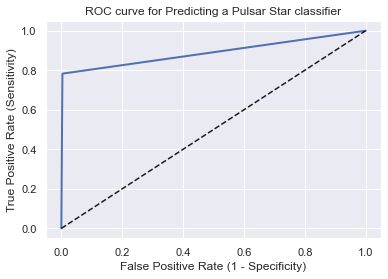

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC: {:.4f}'.format(ROC_AUC))

ROC AUC: 0.8897


In [57]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()
print('Cross validated ROC AUC: {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC: 0.9651


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC() 
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2, 3, 4] ,'gamma':[0.01, 0.02, 0.03, 0.04, 0.05]} 
              ]
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [59]:
print('GridSearch CV best score: {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results:','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search:','\n\n', (grid_search.best_estimator_))

GridSearch CV best score: 0.9785


Parameters that give the best results: 

 {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}


Estimator that was chosen by the search: 

 SVC(C=10, gamma=0.2)


In [60]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9800
